# Alexnet

https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

![alexnet](resources/images/M_3/alex.png)

|   |       Layer       | Input Shape | No of Neurons | Kernel Size | Stride | Padding | Output Shape | Activation |
|---|:-----------------:|-------------|:-------------:|:-----------:|:------:|:-------:|:------------:|------------|
| 0 | Input             | (227,227,3) |       --      |      --     |   --   |    --   | (227,227,3)  |     --     |
| 1 | Convolution 1     | (227,227,3) |       96      |   11 x 11   |    4   |    --   | (55,55,96)   |    ReLU    |
|   | Max Pooling 1     | (55,55,96)  |       --      |    3 x 3    |    2   |    --   | (27,27,96)   |     --     |
| 2 | Convolution 2     | (27,27,96)  |      256      |    5 x 5    |    1   |    2    | (27,27,256)  |    ReLU    |
|   | Max Pooling 2     | (27,27,256) |       --      |    3 x 3    |    2   |    --   | (13,13,256)  |     --     |
| 3 | Convolution 3     | (13,13,256) |      384      |    3 x 3    |    1   |    1    | (13,13,384)  |    ReLU    |
| 4 | Convolution 4     | (13,13,384) |      384      |    3 x 3    |    1   |    1    | (13,13,384)  |    ReLU    |
| 5 | Convolution 5     | (13,13,384) |      256      |    3 x 3    |    1   |    1    | (13,13,256)  |    ReLU    |
|   | Max Pooling 3     | (13,13,256) |       --      |    3 x 3    |    2   |    --   | (6,6,256)    |     --     |
| 6 | Fully Connected 1 | 9216        |               |             |        |         | 4096         |    RelU    |
| 7 | Fully Connected 2 | 4096        |               |             |        |         | 4096         |    ReLU    |
| 8 | Fully Connected 3 | 4096        |               |             |        |         | 1000         | SoftMax    |

In [1]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [3]:
pickle_in = open("./resources/data/face_mask/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (10000, 227, 227, 3) Y_train= (10000,)
X_valid= (800, 227, 227, 3) Y_valid= (800,)
X_test= (992, 227, 227, 3) Y_test= (992,)


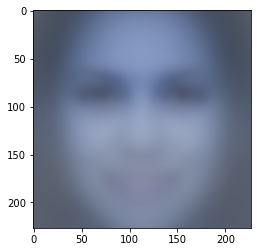

In [4]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [5]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

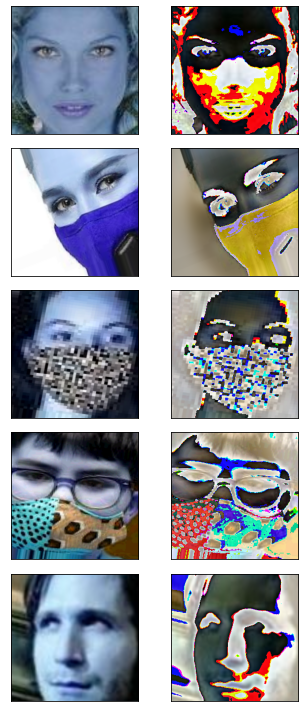

In [7]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [8]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [9]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Epoch 1/20
313/313 [==============================] - 32s 58ms/step - loss: 0.7176 - accuracy: 0.8785 - val_loss: 0.1069 - val_accuracy: 0.9638
Epoch 2/20
313/313 [==============================] - 14s 44ms/step - loss: 0.1328 - accuracy: 0.9576 - val_loss: 0.0479 - val_accuracy: 0.9850
Epoch 3/20
313/313 [==============================] - 14s 43ms/step - loss: 0.0750 - accuracy: 0.9766 - val_loss: 0.0266 - val_accuracy: 0.9900
Epoch 4/20
313/313 [==============================] - 14s 44ms/step - loss: 0.0830 - accuracy: 0.9746 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoch 5/20
313/313 [==============================] - 13s 43ms/step - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0515 - val_accuracy: 0.9912
Epoch 6/20
313/313 [==============================] - 13s 43ms/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 0.0518 - val_accuracy: 0.9825
Epoch 7/20
313/313 [==============================] - 14s 44ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.0659 - val_accuracy:

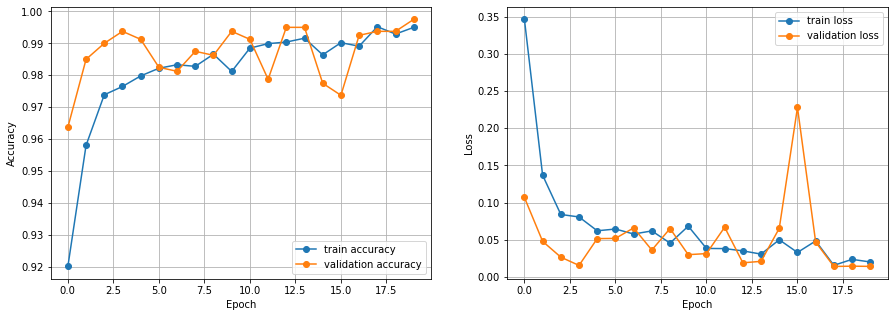

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

31/31 [==============================] - 1s 19ms/step - loss: 0.0304 - accuracy: 0.9929

Test Accuracy: 0.992943525314331

Test Loss: 0.030411839485168457
